# Netflix analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
#Check which columns have NaN values
df.columns[df.isnull().any()]

Index(['director', 'cast', 'country', 'date_added', 'rating', 'duration'], dtype='object')

In [ ]:
#Replace the NaN values from 'country', 'cast', 'director'

df['country'].fillna(value='Unknown', inplace=True)
df['cast'].fillna(value='Unknown', inplace=True)
df['director'].fillna(value='Unknown', inplace=True)


## What is the distribution between Movies and TV Shows?

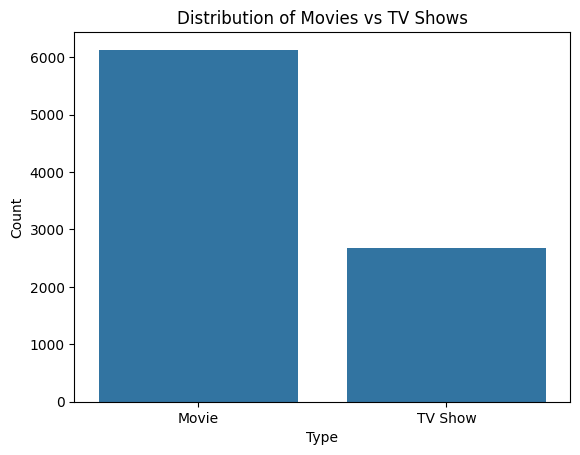

In [7]:
content_type = df['type'].value_counts()

# Plot the distribution
sns.barplot(x=content_type.index, y=content_type.values)
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## How has Netflix’s content library grown over the years?

In [15]:
#Preparing the date_added column. 
df2 = df.copy()

df2['date_added'] = pd.to_datetime(df2['date_added'].dropna().str.strip())


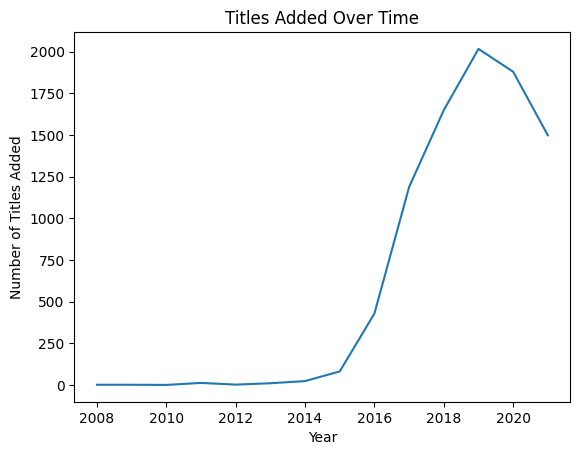

In [16]:
# Extract the year content was added
df2['year_added'] = df2['date_added'].dt.year

# Count titles added by year
titles_per_year = df2['year_added'].value_counts().sort_index()


# Plot the trend
plt.plot(titles_per_year.index, titles_per_year.values)
plt.title('Titles Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

## Which are the top 5 genres/categories on Netflix?

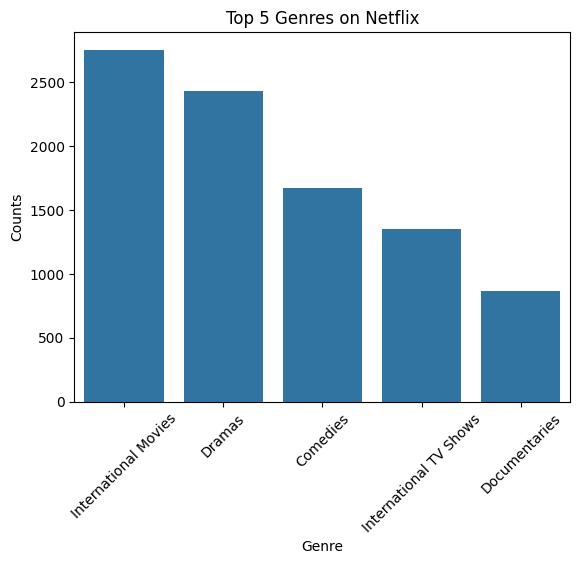

In [10]:

#Split the 'listed_in' column and explode into individual genres
df['listed_in'] = df['listed_in'].str.split(', ')  # This splits the genre string into a list
genres = df.explode('listed_in')  # Explode the list into separate rows for each genre

#Count the occurrences of each genre
top_5_genres = genres['listed_in'].value_counts().head(5)

# Plot the top 5 genres
sns.barplot(x=top_5_genres.index, y=top_5_genres.values)
plt.ylabel('Counts')
plt.xlabel('Genre')
plt.title('Top 5 Genres on Netflix')
plt.xticks(rotation=45)
plt.show()

## Which countries produce the most Netflix content?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Mexico')])

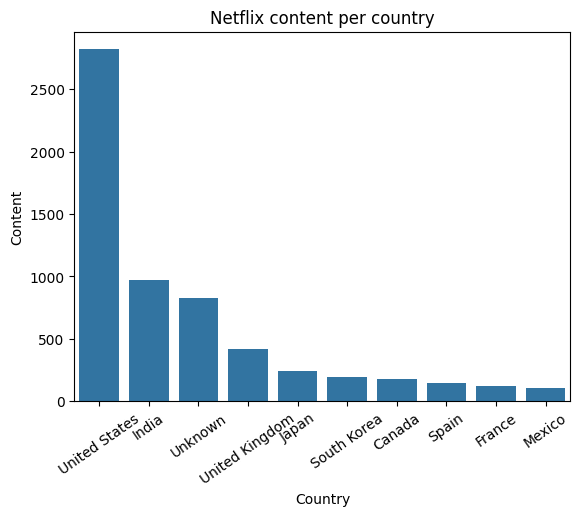

In [17]:
sns.barplot(data=df['country'].value_counts().head(10))
plt.xlabel('Country')
plt.ylabel('Content')
plt.title('Netflix content per country')
plt.xticks(rotation=35)

## What are the most common content ratings on Netflix?

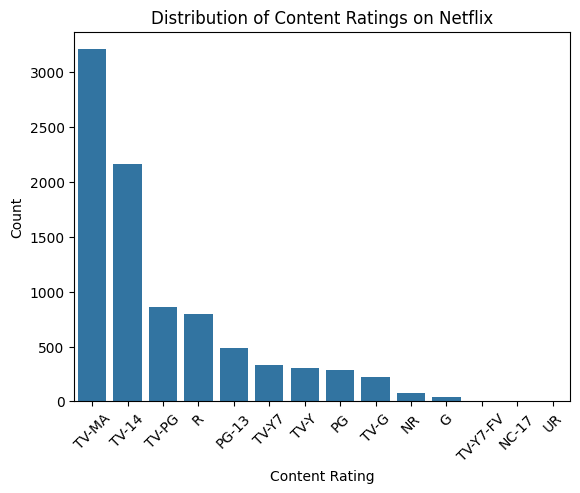

In [20]:
# Step 1: Count the occurrences of each rating
ratings_count = df['rating'].value_counts()

#Drop the rows that have '74 min', '84 min', '66 min' as ratings
ratings_count.drop(['74 min','84 min', '66 min'], inplace=True)

# Step 2: Plot the distribution using a bar chart

sns.barplot(x=ratings_count.index, y=ratings_count.values)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings on Netflix')
plt.xticks(rotation=45)
plt.show()

## What is the trend in content duration (for Movies)?

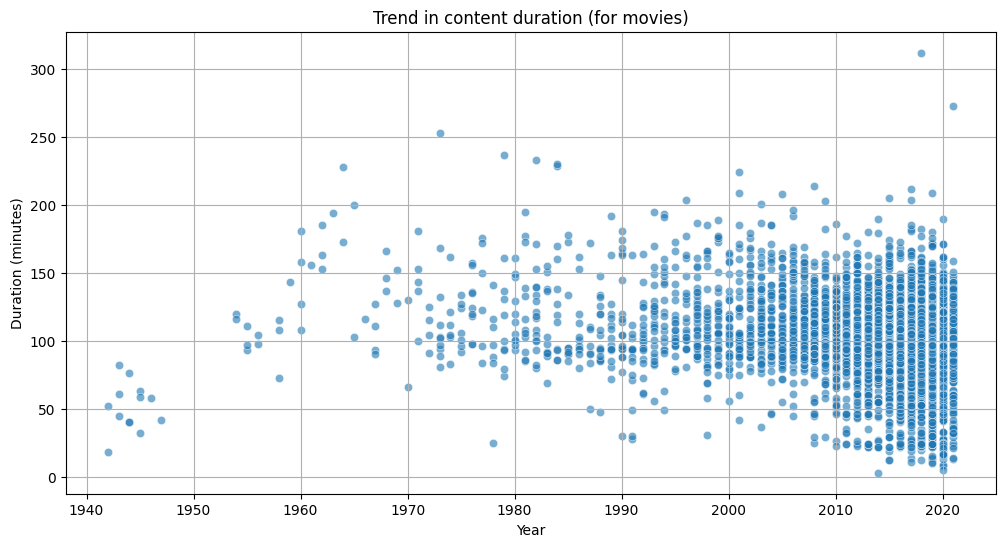

In [24]:
# Filter a dataframe to obtain only movie information
df_movies = df[df['type'] == 'Movie']
df_movies = df_movies.dropna(subset=['duration'])

# Remove the "min" part and convert the 'duration' column to integers
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_year', y='duration', data=df_movies, alpha=0.6)
plt.title('Trend in content duration (for movies)')
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()
